# 人口変化率の分布

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

filepath = '../../../data/processed/df_filtered_5years_exclude_too_far_islands_exclude_already_treatment.xlsx'
df = pd.read_excel(filepath)
df['population_change_rate'] = df.groupby('island_id')['population'].pct_change().dropna() * 100

/tmp/ipykernel_39646/3927777795.py:9: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['population_change_rate'] = df.groupby('island_id')['population'].pct_change().dropna() * 100


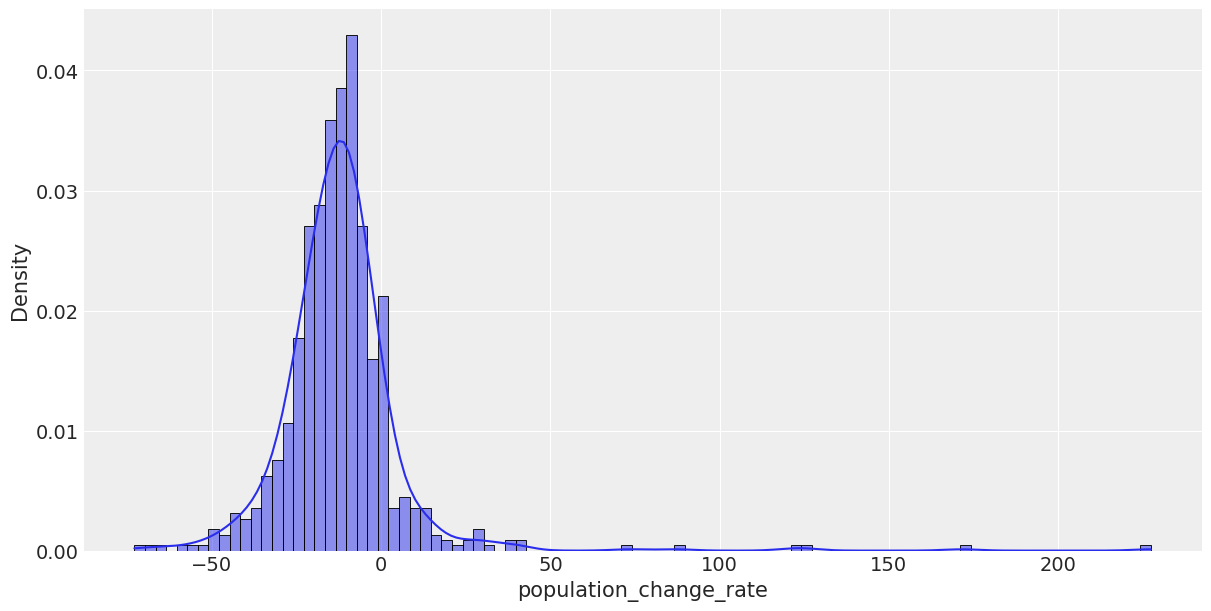

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(df['population_change_rate'], kde=True, stat='density');

In [11]:
df['population_change_rate'].describe()

count    722.000000
mean     -11.943989
std       19.500419
min      -72.916667
25%      -20.123202
50%      -12.590872
75%       -6.071656
max      227.390158
Name: population_change_rate, dtype: float64

In [ ]:
# 特定の列の外れ値を除去する例
column = 'population_change_rate'

# 平均と標準偏差の計算
mean = df[column].mean()
std = df[column].std()

# 外れ値の定義（ここでは3標準偏差を超えるデータを外れ値とみなす）
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

# 外れ値を除去
df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 除去されたデータを確認
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
outliers

,island,year,island_id,region_code,region_name,prefecture_code,population,treatment_group,treatment_group_mainland,year_bridge,after_treatment,passage_of_year,year_connect_mainland,dummy_after_connect_mainland,income,prefecture_name,area_km2,distance_m,population_change_rate
190,因島,1995,94,34206,（旧）因島市,34,28411.0,1,1,1983,1,12,1983,1,3506.231862,広島県,35.04,800.0,121.804981
211,生口島,1995,95,34430,（旧）瀬戸田町,34,11097.0,1,1,1991,1,4,1991,1,1509.931029,広島県,31.21,500.0,87.007078
225,大久野島,2010,99,34203,竹原市,34,26.0,0,0,0,0,0,0,0,3387.313924,広島県,0.72,1263.0,73.333333
242,長島,1985,103,34427,（旧）大崎町,34,39.0,1,0,1987,0,0,0,0,NaN,広島県,1.04,350.0,-72.916667
364,江田島・能美島,1990,117,3431X,（旧）江田島町・大柿町・沖美町・能美町,34,37257.0,1,1,1973,1,17,1973,1,1807.199041,広島県,91.33,300.0,227.390158
380,沖野島,2015,118,34215,江田島市,34,9.0,1,1,1972,1,43,1973,1,2769.395700,広島県,0.94,30.0,125.000000
399,屋代島,2000,125,35302,（旧）大島町,35,21796.0,1,1,1976,1,24,1976,1,747.373507,山口県,128.48,950.0,171.499751


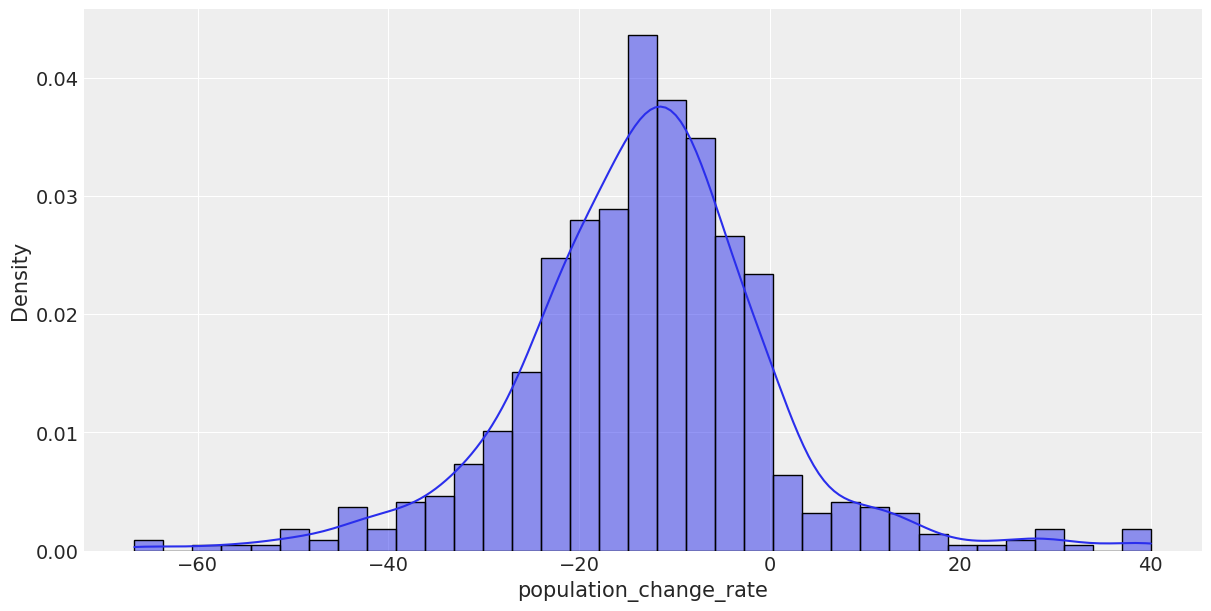

In [29]:
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['population_change_rate'], kde=True, stat='density');